<a href="https://colab.research.google.com/github/Jasmine-kaur8/Bigmart_sales_prediction/blob/main/BigMart_Sales_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#reading the train data:

from google.colab import files
uploaded = files.upload()

Saving bigdatamart_Train(project7).csv to bigdatamart_Train(project7).csv


Imported the train data

In [ ]:
#reading the test data

from google.colab import files
uploaded = files.upload()

Saving bigdatamart_Test(project7).csv to bigdatamart_Test(project7).csv


Imported the test data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


import warnings
warnings.filterwarnings('ignore')


Imported required libraries.

EDA

In [ ]:
train = pd.read_csv('bigdatamart_Train(project7).csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Reading the train data

In [ ]:
test = pd.read_csv('bigdatamart_Test(project7).csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Reading the test data

In [ ]:
train.shape

(8523, 12)

There are 8523 rows and 12 columns

In [ ]:
test.shape

(5681, 11)

There are 5681 rows and 12 columns

In [ ]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are 1463 null rows in the Item_Weight column and 2410 null rows in Outlet_Size column. All other columns has no null value

In [ ]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

There are 976 null rows in the Item_Weight column and 1606 null rows in Outlet_Size column. All other columns has no null value

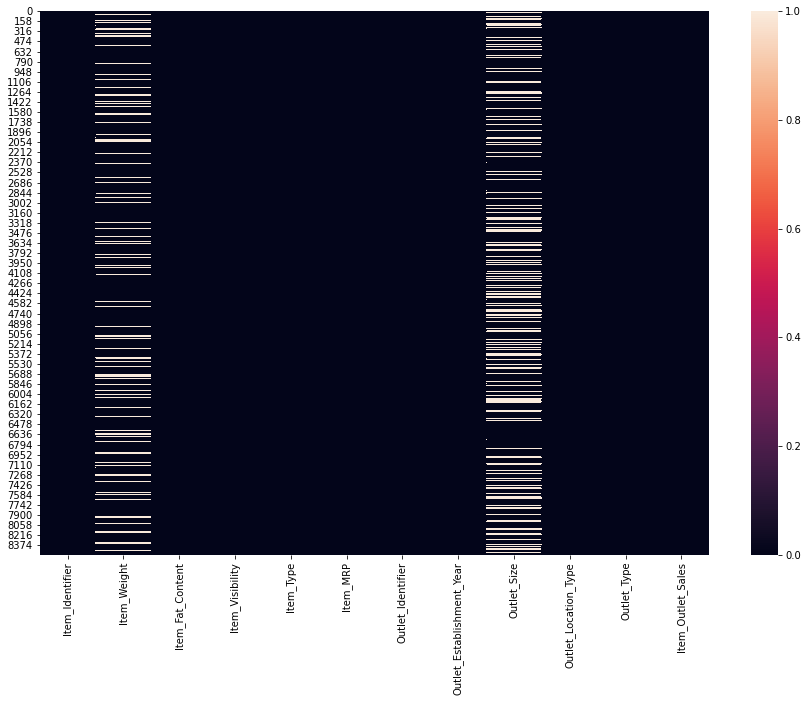

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(train.isnull())
plt.show()

The heatmap show the null values of the train data

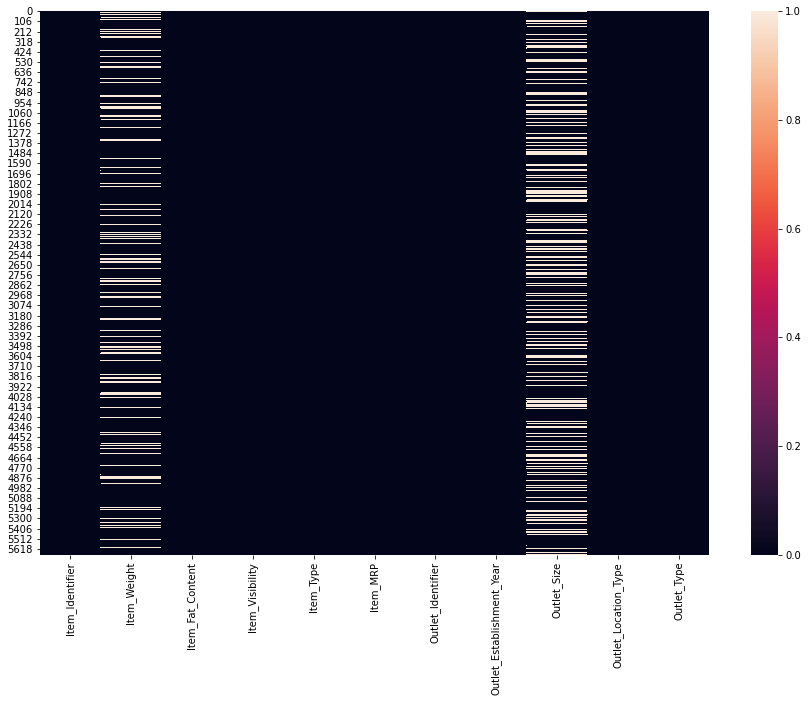

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(test.isnull())
plt.show()

The heatmap show the null values of the test data

In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


The description of the train data shows that Item_Outlet_Sales has outliers. Also, Item_Visibility has high standard deviation.

In [ ]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


This is the description of the numerical columns of the test data

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Some columns are object type and some columns are numerical. There are null values in the column: Item_Weight and Outlet_Size.


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Some columns are object type and some columns are numerical. There are null values in the column: Item_Weight and Outlet_Size.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd26087de10>,
      dtype=object)

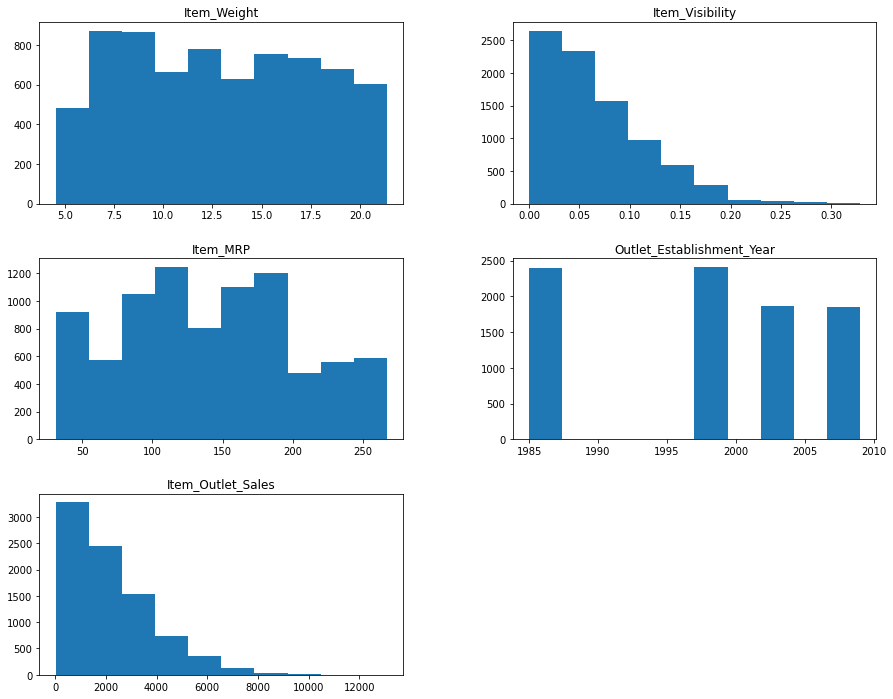

In [ ]:
train.hist(figsize=(15,12), grid = False)



Histograms show that the data of Item_Outlet_Sales and Item_Visibility are skewed data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd268ebeb90>,
      dtype=object)

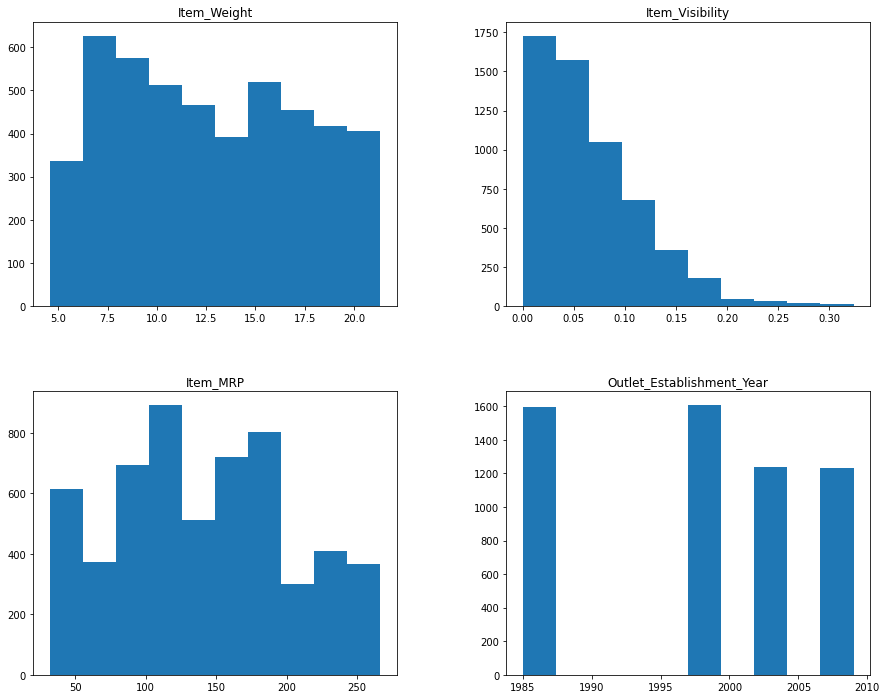

In [ ]:
test.hist(figsize=(15,12), grid = False)

Histograms show that the data of Item_Visibility is skewed data.

In [ ]:
train.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

Item_Visibility and Item_Outlet_Sales have high skewness

In [ ]:
test.skew()

Item_Weight                  0.129975
Item_Visibility              1.238312
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
dtype: float64

Item_Visibility has high skewness

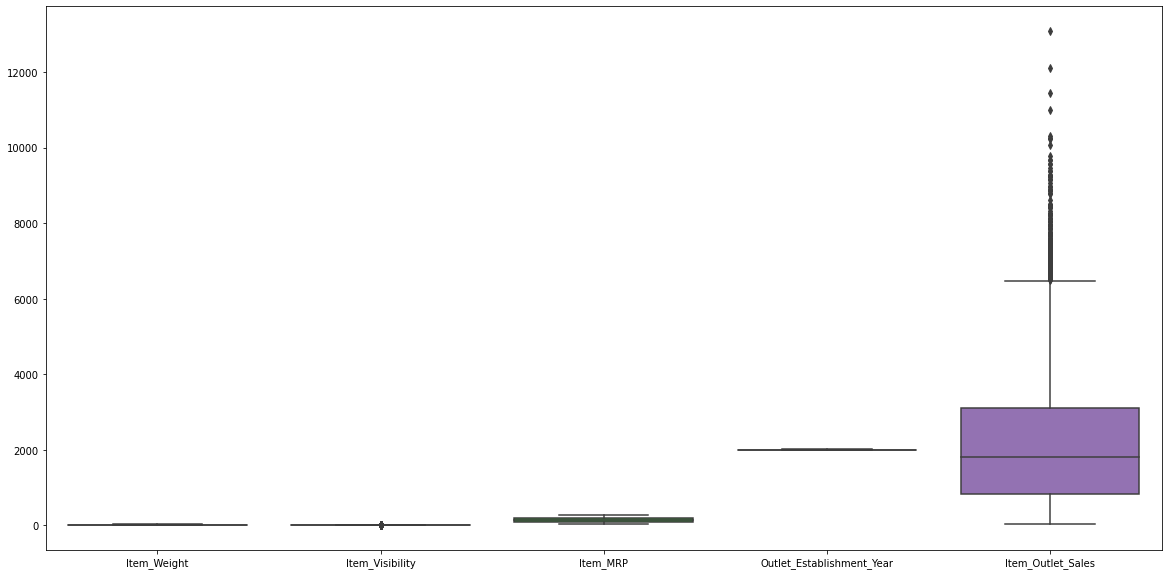

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.boxplot(data = train, ax=ax)
plt.show()

Item_Outlet_Sales has outliers.

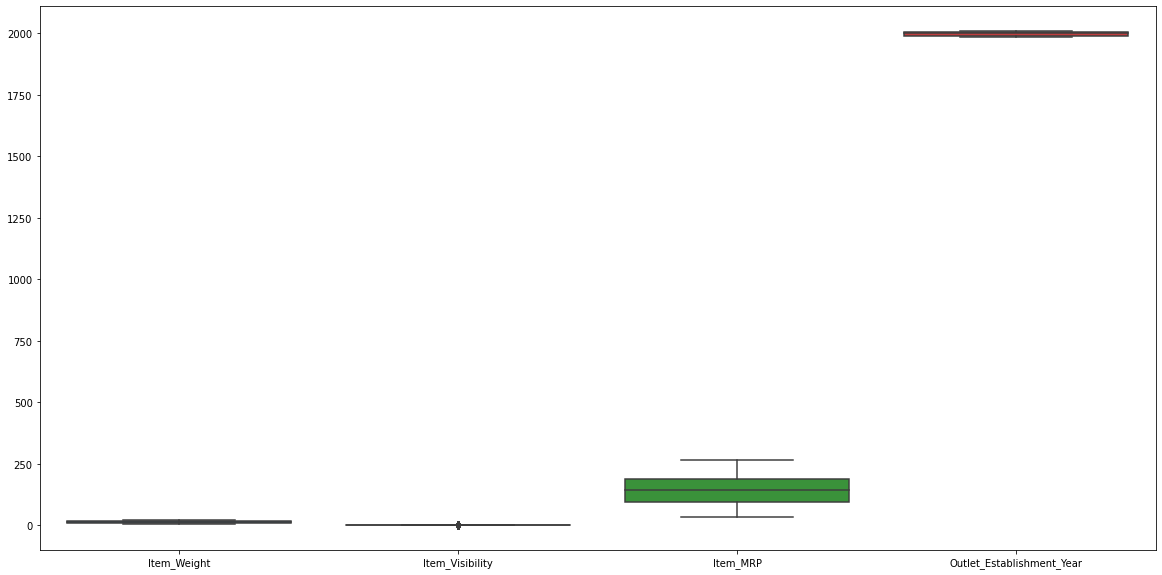

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.boxplot(data = test, ax=ax)
plt.show()

Test data don't have any outliers

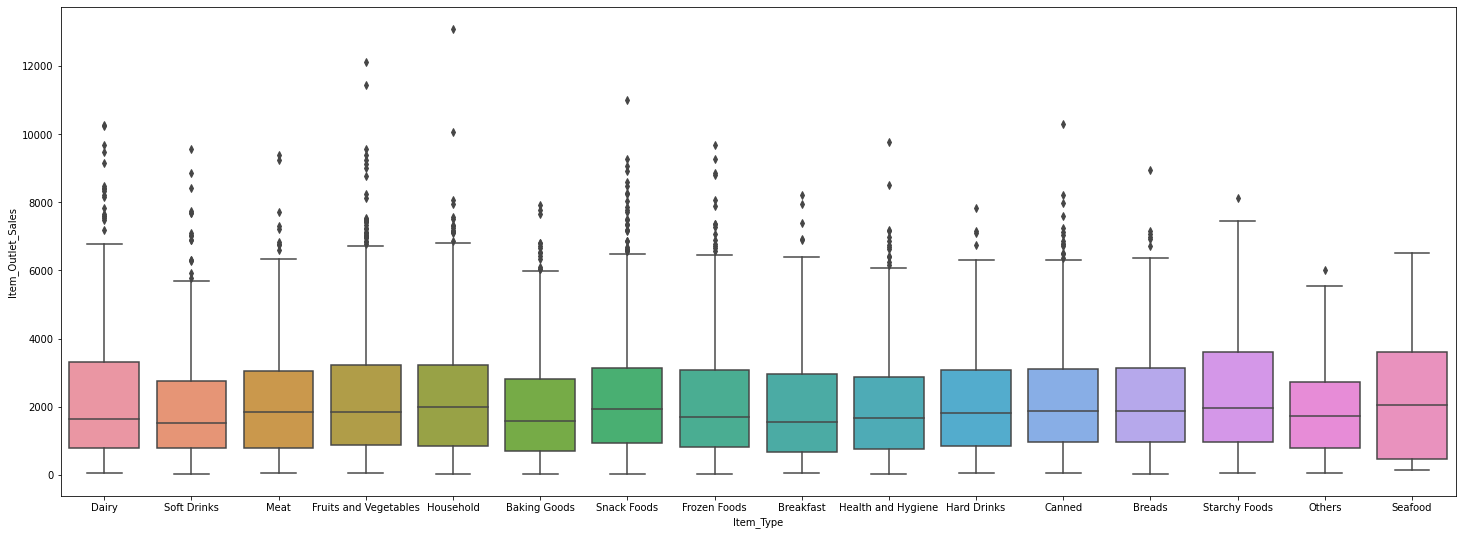

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(25,9))
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=train)

All the types of Item has outliers except Seafood

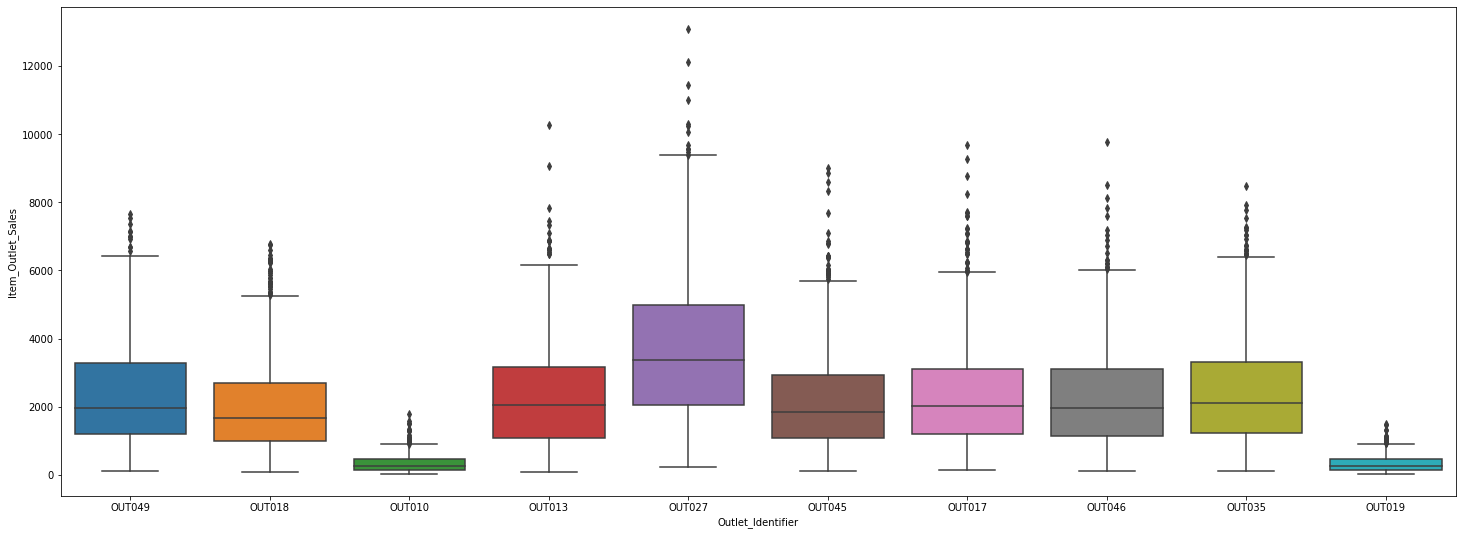

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(25,9))
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=train)

All the Outlier Identifiers have outliers

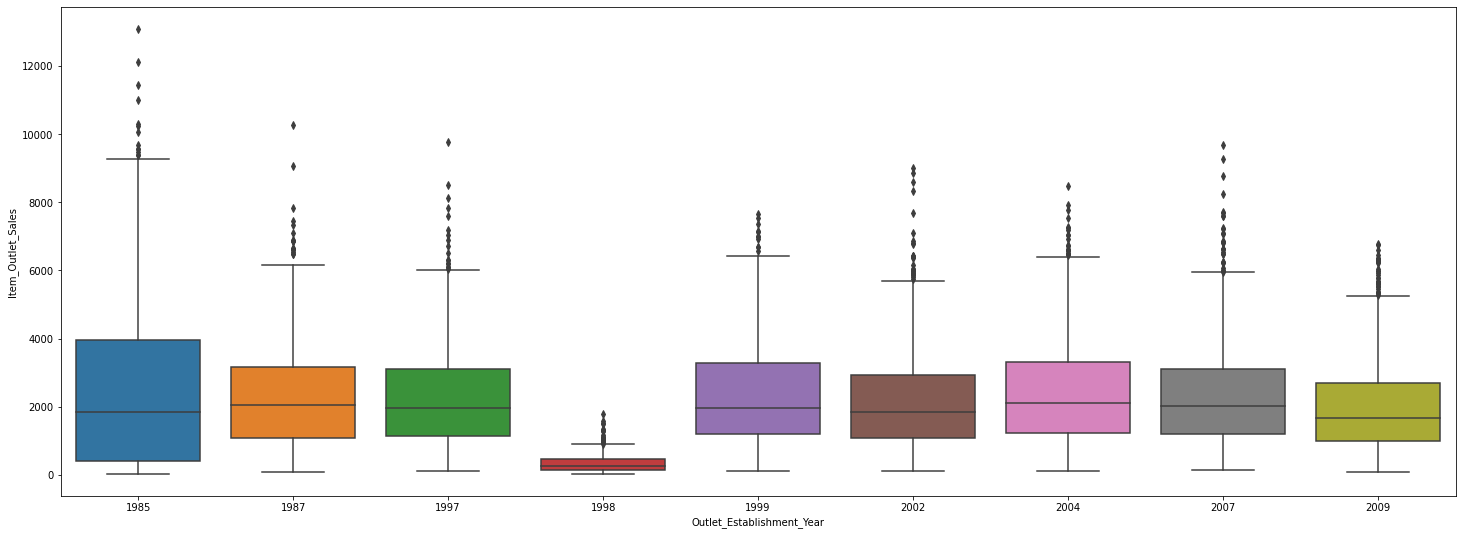

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(25,9))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=train)


In all the year of establishment, there are out;liers

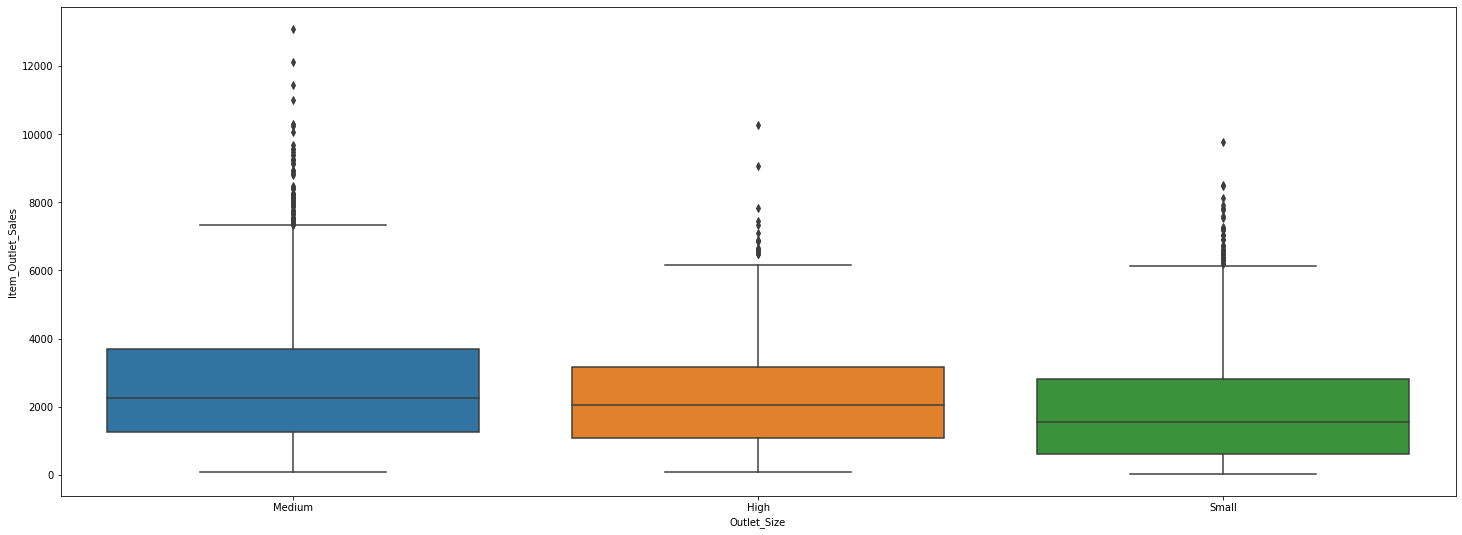

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(25,9))
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train)


In all outlet sizes, there are outlies.

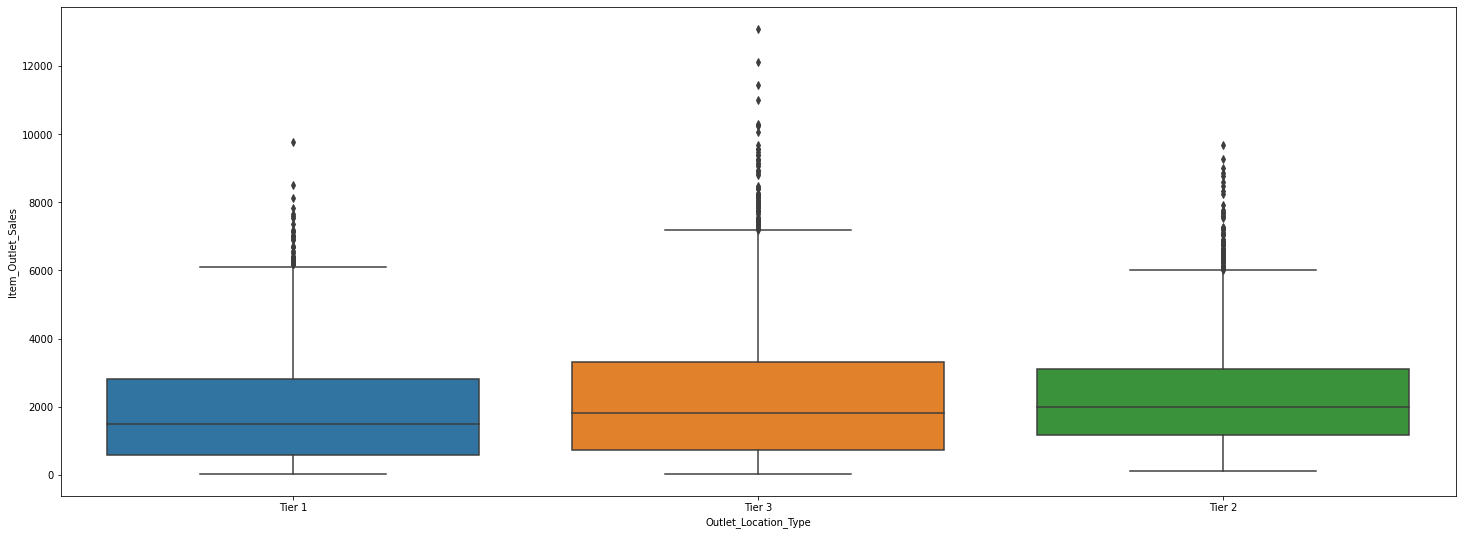

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(25,9))
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train)


There are outliers in all outlet location type

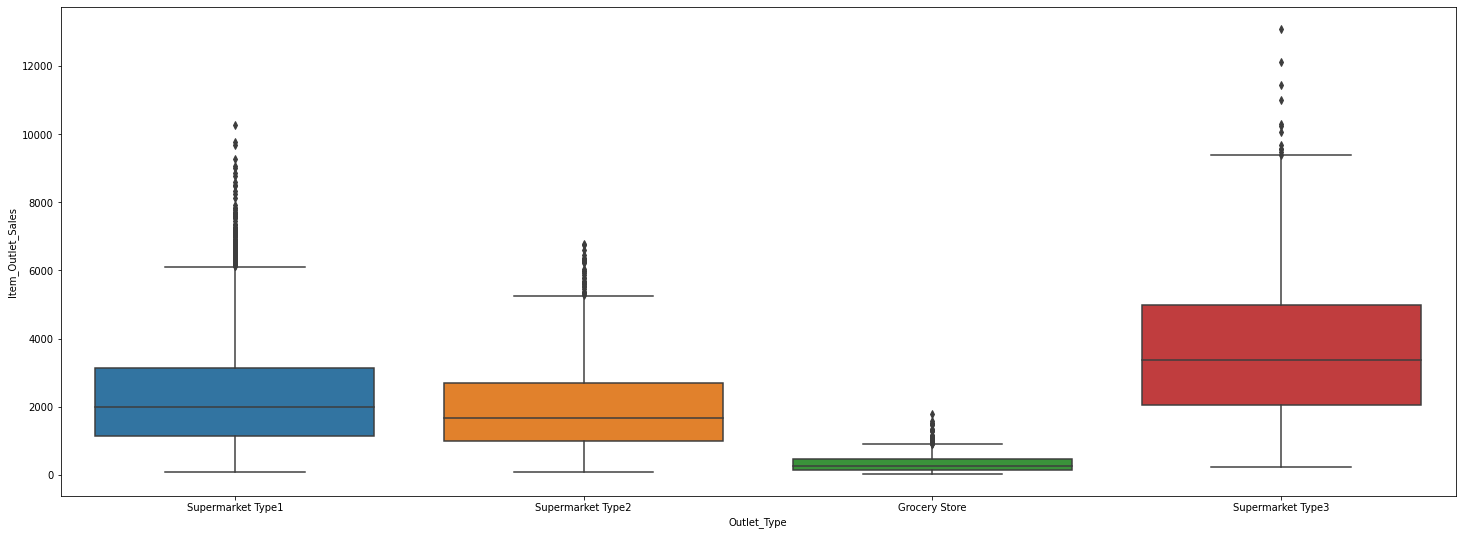

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(25,9))
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train)

There are outliers in all the types of outlets

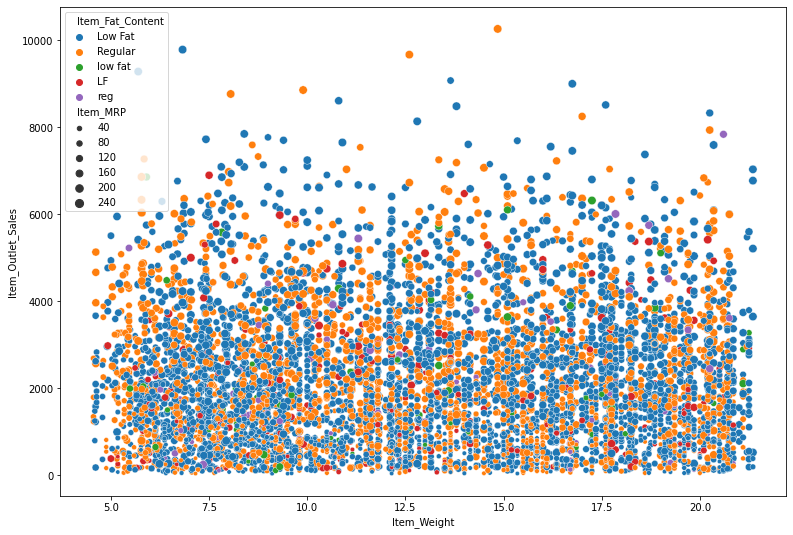

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(13,9))
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_MRP',data=train)

Item weight lies in entire range of weights in both low fat food and regular fat content food. There is no exact relationship between item weight and item outlet sales.

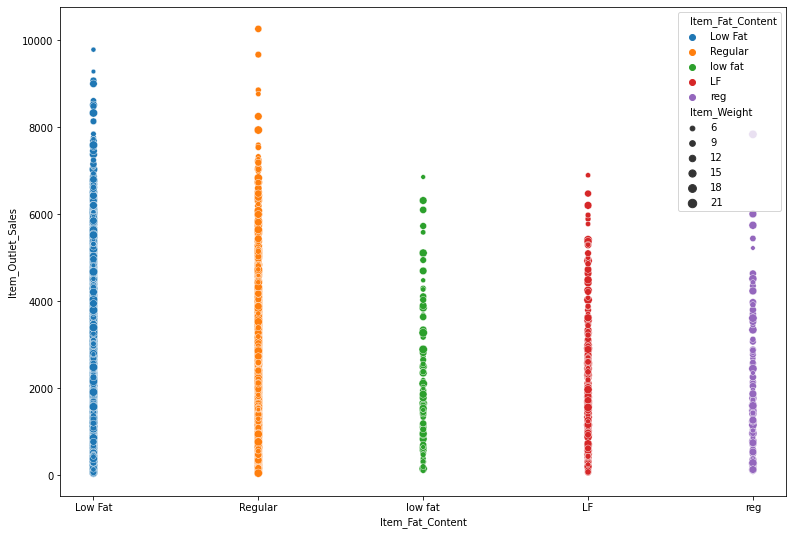

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(13,9))
sns.scatterplot(x='Item_Fat_Content',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=train)

Low fat and regular fat content both lies in the entire range of item outlet salaes.

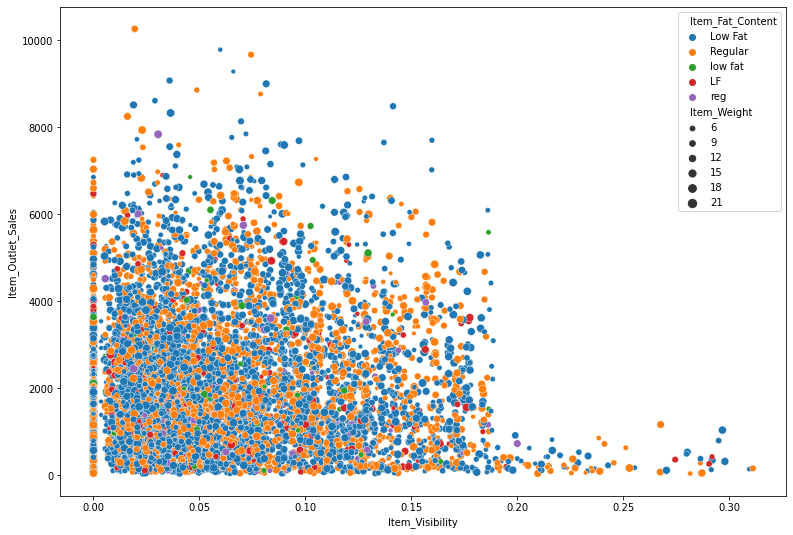

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(13,9))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=train)

There is no relationship between item visibility and the item outlet sales. Also, item visibility of more than 20% corresponds to vary less outlet sales.

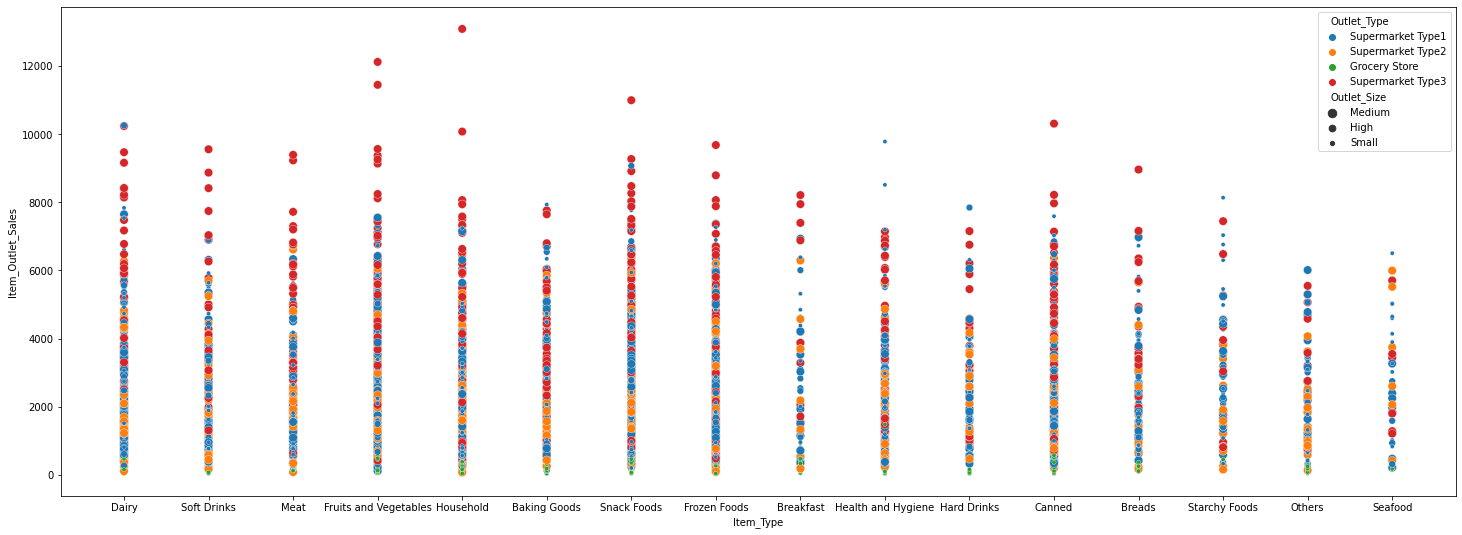

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(25,9))
sns.scatterplot(x='Item_Type',y='Item_Outlet_Sales',hue='Outlet_Type',size='Outlet_Size',data=train)

The high outlet sales are mostly happening in the supermaket type 3 and the most of the low outlet sales are happening in the supermarket type 1. Very low outlet sales are happening in the grocery store. The Outlet sales around 2000 is happening in the supermarket type 2.

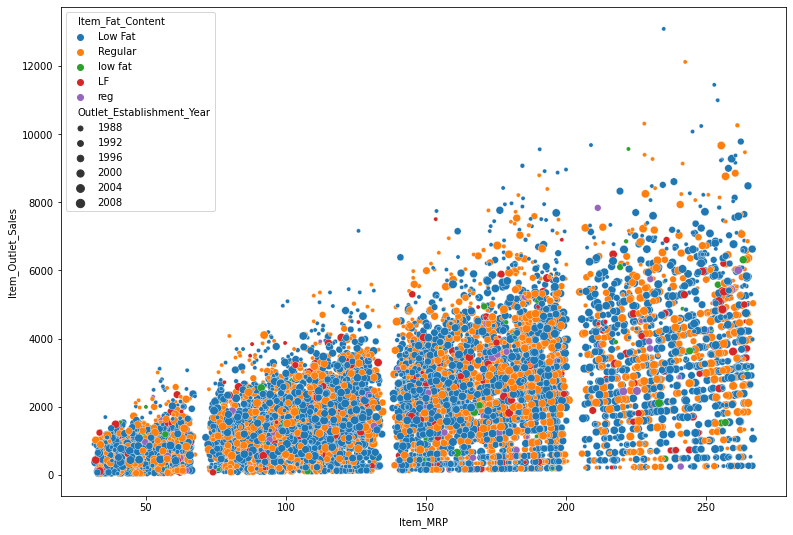

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(13,9))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Outlet_Establishment_Year',data=train)

There exists an positive relationship between Item MRP and the item outlet sales. High sales happen in the outlets than are established in 1988 and 1992. The establishments in 2004 and 2008 are able to make less sale that are of low price. The items with high MRP are sold more in the outlets that are established in 2000.

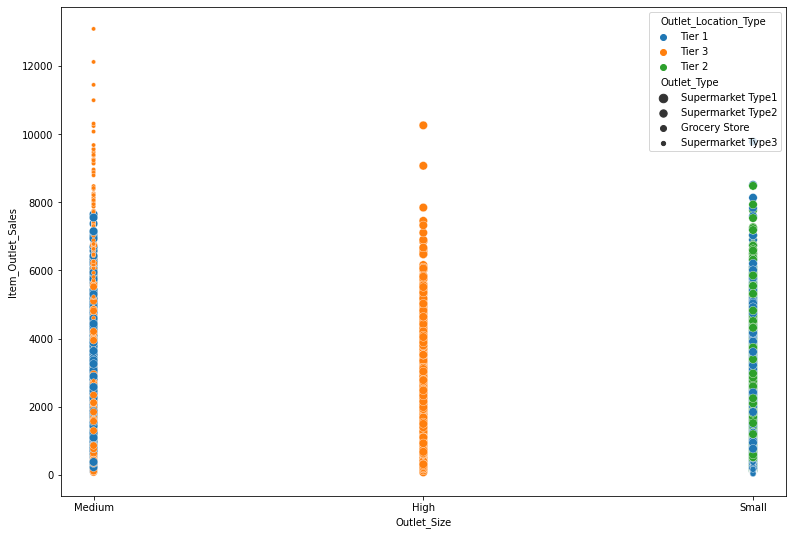

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(13,9))
sns.scatterplot(x='Outlet_Size',y='Item_Outlet_Sales',hue='Outlet_Location_Type',size='Outlet_Type',data=train)

High outlet size are present in Tier 3. Small Outlet size are present in Tier 1 and Tier 2. Medium outlet size are present in Tier 1 and Tier 3.Also, high outlet sales happen in the supermarket type 3.

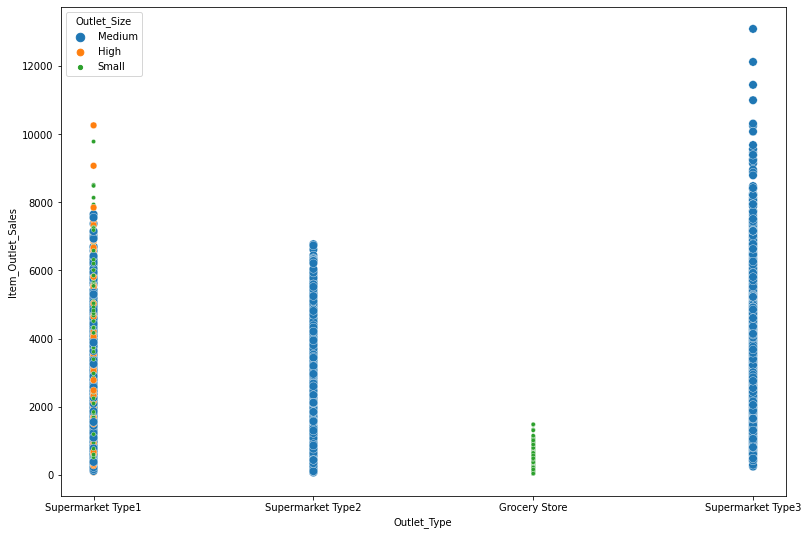

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(13,9))
sns.scatterplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size',size='Outlet_Size',data=train)

Small Outlet size are grocery stores. Supermarket type 2 and type 3 are medium size outlets. Supermarket type 1 consists of all sizes of outlet.

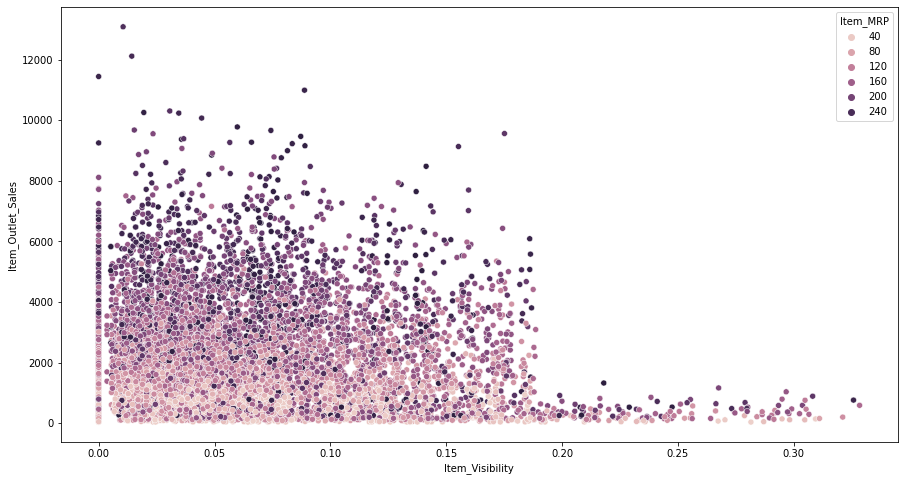

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(15,8))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_MRP',data=train)

MRP and outlet sales are positively related to each other. There is no relationship between Item visibility and the item outlet sales. 

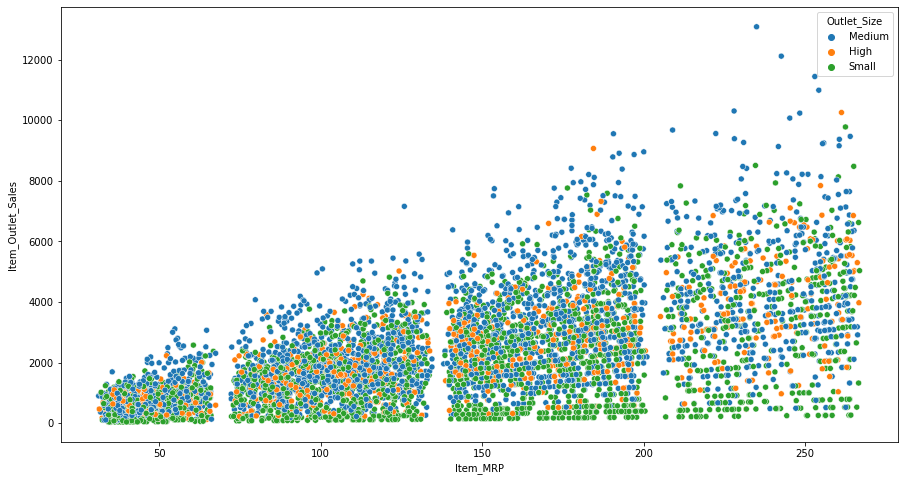

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(15,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Outlet_Size',data=train)

Medium size outlets are able to sell high sales. Small outlets are able to sell small quantity. And High outlet size is able to sell medium quantity of sales.

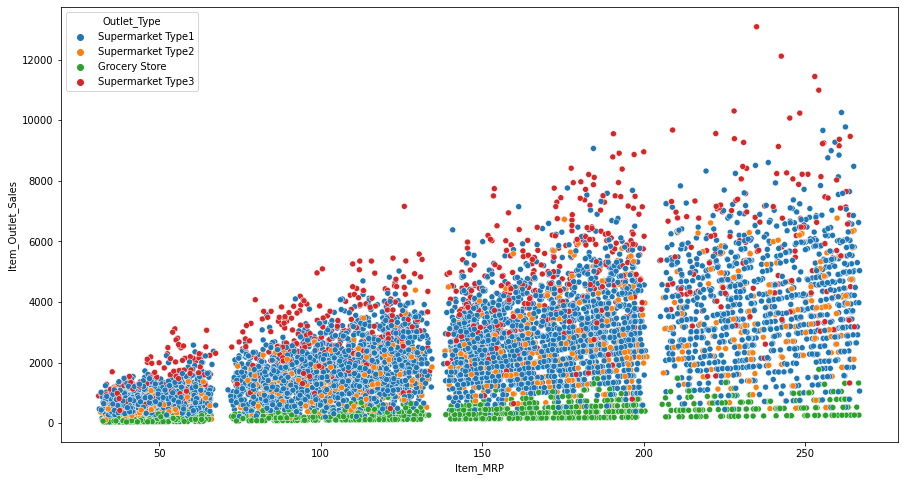

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(15,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Outlet_Type',data=train)

Supermarket type 3 is able to sell high quantity. Supermarket type 1 is able to sell a large range of quantity. Supermarket type 2 is able to sell high range of quantity but less units of quantity. Grocery stores sell vary less quantity. 

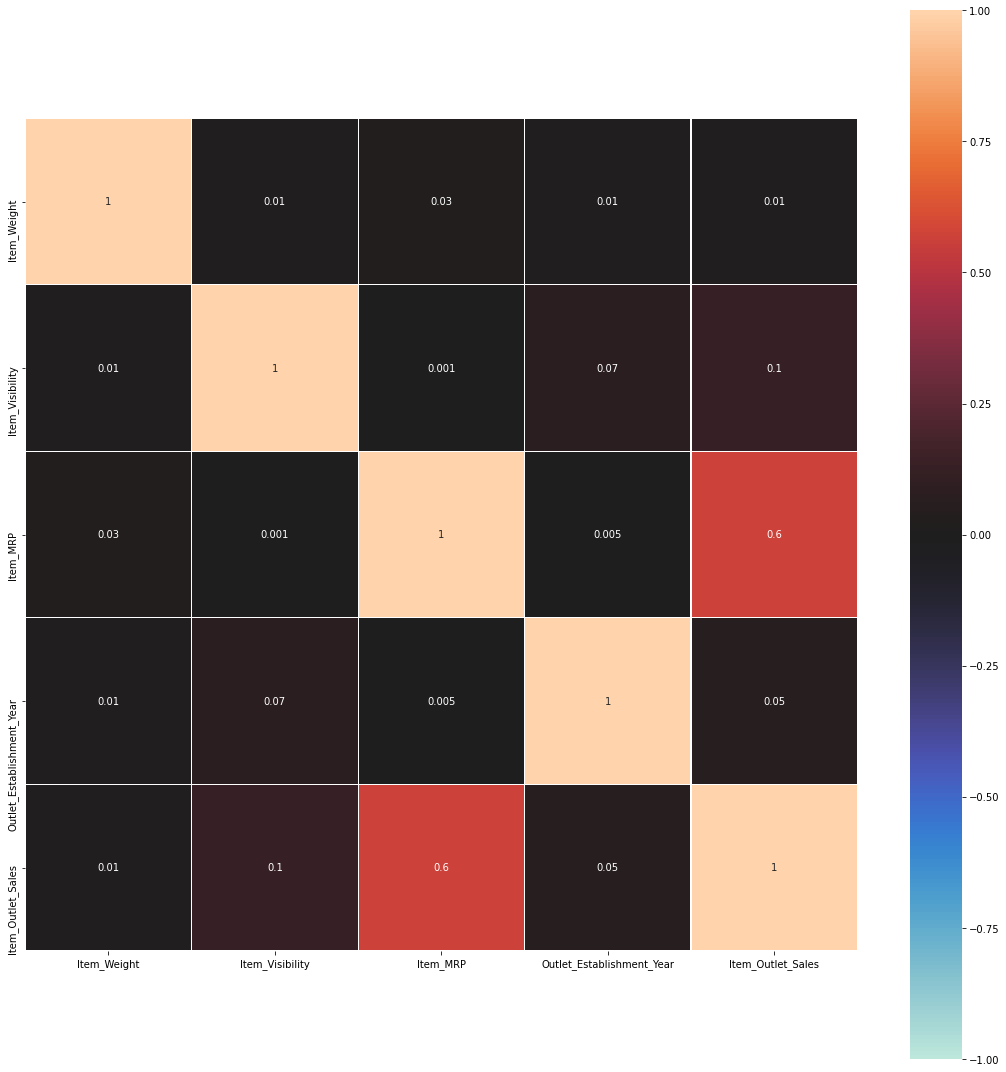

In [ ]:
train_corr = train.corr().abs()
plt.figure(figsize = (15,15))
sns.heatmap(train_corr, vmin = -1, vmax = 1, annot = True, square = True, center = 0, fmt = '.1g', linewidth = .1,)
plt.tight_layout()

Any two features have very low correlation between each other. Even the features have low correlation with the target variable except the Item MRP. It means Item MRP has comparitively high correlation with the target variable.

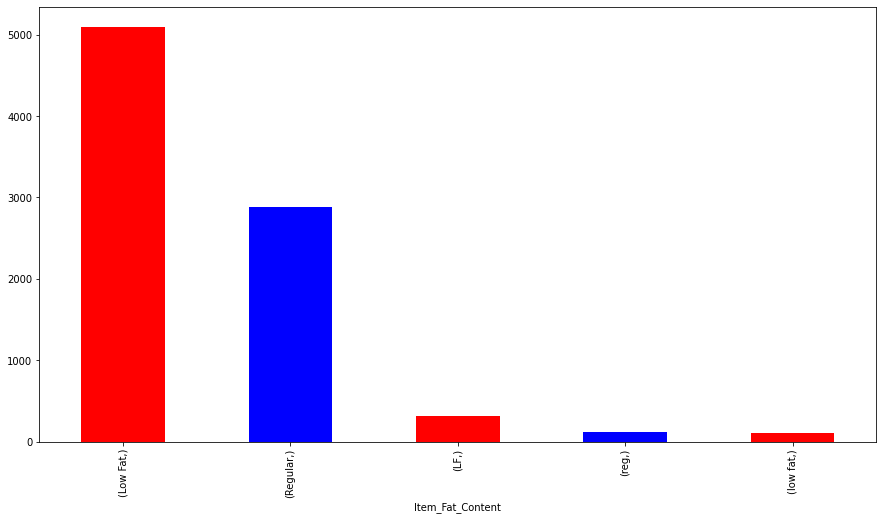

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(15,8))
pd.DataFrame(train['Item_Fat_Content']).value_counts().plot(kind='bar', color=['r','b'])


The graph shows the visualization of value counts of the low fat and regular fat content.

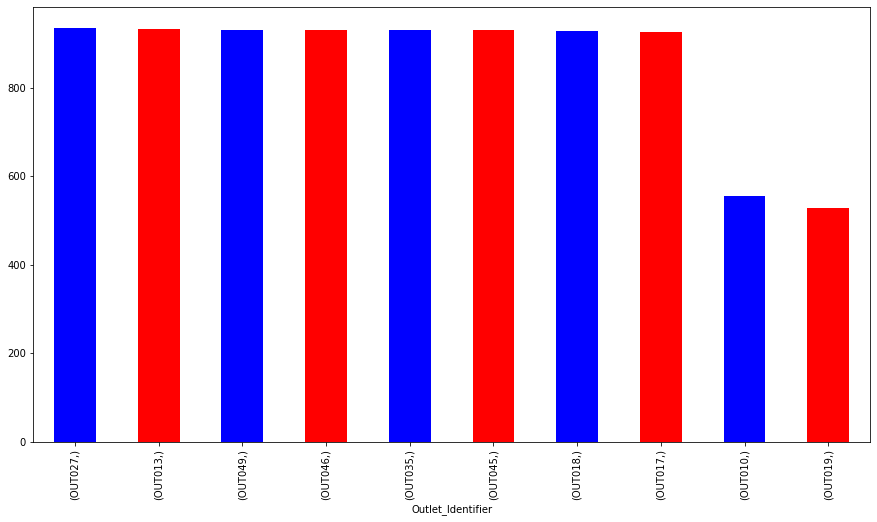

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(15,8))
pd.DataFrame(train['Outlet_Identifier']).value_counts().plot(kind='bar', color=['b','r'])

Outlet itentifier has almost same value counts except for two identifiers.

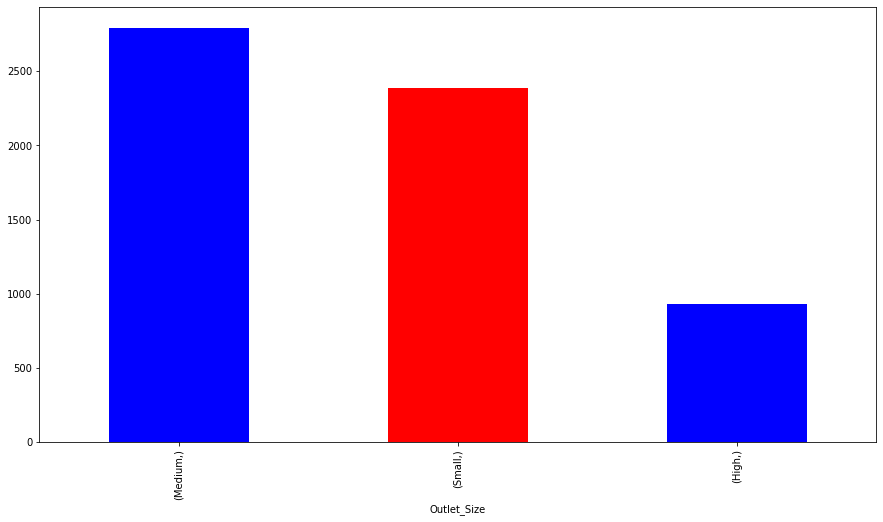

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(15,8))
pd.DataFrame(train['Outlet_Size']).value_counts().plot(kind='bar', color=['b','r'])

The Medium size outlets are above 2500, small size outlets are between 2000 and 2500. High size outlets are around 1000.

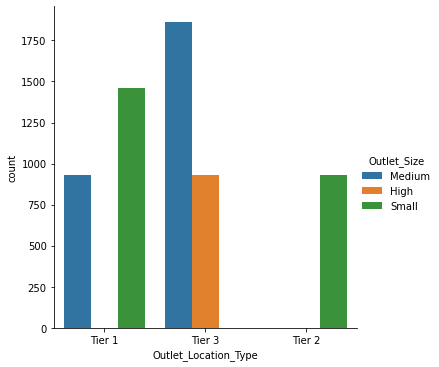

In [ ]:
sns.factorplot('Outlet_Location_Type',data = train,hue ='Outlet_Size' ,kind='count')

Medium size outlets are located in tier 1 and tier 3. High outlet size are located in the tier 3. Small outlet size are located in tier 1 and tier 2.

In [ ]:
# combining Item_Fat_Content misspelled
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

Since low fat, LF, Low Fat signifies the same fat content, so we merged these and combined them together as Low Fat. Also, reg and Regular show the same fat content, so we combined it as Regular. 

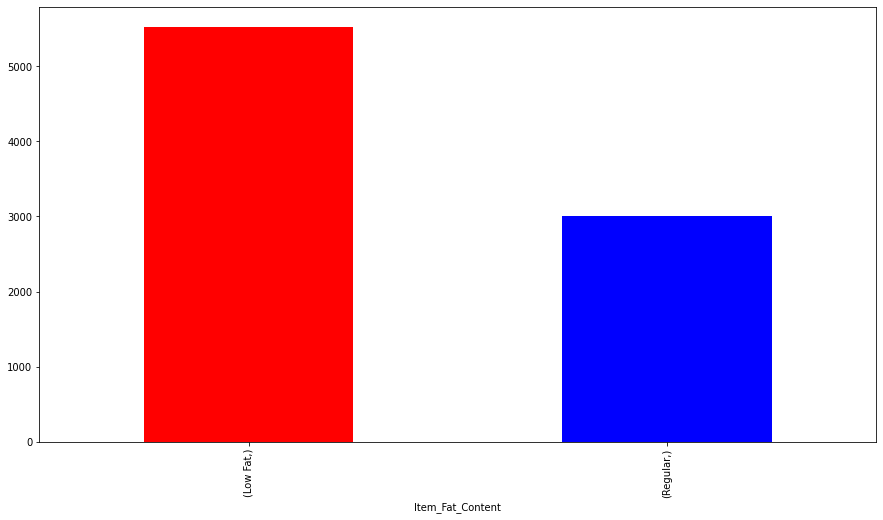

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(15,8))
pd.DataFrame(train['Item_Fat_Content']).value_counts().plot(kind='bar', color=['r','b'])

Visualization of fat content feature.

In [ ]:
complete_data = [train, test]

Combined the train data and the test data to deal with the null values. 

In [ ]:
for data in complete_data:
    data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace = True)
    data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace = True)

Replace the null values of Item Weight with the mean value of the column, and the null values of Outlet size with the mode value.

In [ ]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

There is no null value in the train data

In [ ]:
test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

There is no null value in the test data.

In [ ]:
lab_enc = LabelEncoder()

Initiated the label encoder.

In [ ]:
a1 = lab_enc.fit_transform(train['Item_Fat_Content'])
b1 = lab_enc.fit_transform(train['Item_Type'])
c1 = lab_enc.fit_transform(train['Outlet_Size'])
d1 = lab_enc.fit_transform(train['Outlet_Location_Type'])
e1 = lab_enc.fit_transform(train['Outlet_Type'])
f1 = lab_enc.fit_transform(train['Item_Identifier'])
g1 = lab_enc.fit_transform(train['Outlet_Identifier'])
(a1,b1,c1,d1,e1,f1,g1)

(array([0, 1, 0, ..., 0, 1, 0]),
 array([ 4, 14, 10, ...,  8, 13, 14]),
 array([1, 1, 1, ..., 2, 1, 2]),
 array([0, 2, 0, ..., 1, 2, 0]),
 array([1, 2, 1, ..., 1, 2, 1]),
 array([ 156,    8,  662, ..., 1357,  681,   50]),
 array([9, 3, 9, ..., 6, 3, 8]))

Used label encoder to convert the categorical data into numerical data in the train data.


In [ ]:
a2 = lab_enc.fit_transform(test['Item_Fat_Content'])
b2 = lab_enc.fit_transform(test['Item_Type'])
c2 = lab_enc.fit_transform(test['Outlet_Size'])
d2 = lab_enc.fit_transform(test['Outlet_Location_Type'])
e2 = lab_enc.fit_transform(test['Outlet_Type'])
f2 = lab_enc.fit_transform(test['Item_Identifier'])
g2 = lab_enc.fit_transform(test['Outlet_Identifier'])
(a1,b1,c1,d1,e1,f1,g1)

(array([0, 1, 0, ..., 0, 1, 0]),
 array([ 4, 14, 10, ...,  8, 13, 14]),
 array([1, 1, 1, ..., 2, 1, 2]),
 array([0, 2, 0, ..., 1, 2, 0]),
 array([1, 2, 1, ..., 1, 2, 1]),
 array([ 156,    8,  662, ..., 1357,  681,   50]),
 array([9, 3, 9, ..., 6, 3, 8]))

Used label encoder to convert the categorical data into numerical data in the test data.

In [ ]:
train['Item_Fat_Content'] = a1
train['Item_Type'] = b1
train['Outlet_Size'] = c1
train['Outlet_Location_Type'] = d1
train['Outlet_Type'] = e1
train['Item_Identifier']= f1
train['Outlet_Identifier'] = g1

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Train data after encoding.

In [ ]:
test['Item_Fat_Content'] = a2
test['Item_Type'] = b2
test['Outlet_Size'] = c2
test['Outlet_Location_Type'] = d2
test['Outlet_Type'] = e2
test['Item_Identifier']= f2
test['Outlet_Identifier'] = g2

test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3


Test data after encoding

In [ ]:
train_data = train.drop(columns = ['Item_Weight' , 'Item_Visibility'])

Dropping the columns: Item_Weight , Item_Visibility from the train data.


In [ ]:
test_data = test.drop(columns = ['Item_Weight' , 'Item_Visibility'])

Dropping the columns: Item_Weight , Item_Visibility from the test data.

In [ ]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(train_data)

Applying the standard scaler

In [ ]:
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_scaled.shape[1]
vif = pd.DataFrame()

vif['Features'] = train_data.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif

,Features,vif
0,Item_Identifier,1.015051
1,Item_Fat_Content,1.034906
2,Item_Type,1.022316
3,Item_MRP,1.660044
4,Outlet_Identifier,4.157865
5,Outlet_Establishment_Year,1.069148
6,Outlet_Size,1.724503
7,Outlet_Location_Type,5.886039
8,Outlet_Type,2.971117
9,Item_Outlet_Sales,2.035485


VIF is less 10, so there is no problem of multicollinearity.

In [ ]:
scalar1 = StandardScaler()
x_scaled1 = scalar.fit_transform(test_data)

Applying standard scaler to the test data.

In [ ]:
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_scaled1.shape[1]
vif = pd.DataFrame()

vif['Features'] = test_data.columns
vif['vif'] = [variance_inflation_factor(x_scaled1,i) for i in range(x_scaled1.shape[1])]

vif

,Features,vif
0,Item_Identifier,1.012111
1,Item_Fat_Content,1.038605
2,Item_Type,1.030374
3,Item_MRP,1.004230
4,Outlet_Identifier,4.137022
5,Outlet_Establishment_Year,1.069143
6,Outlet_Size,1.692502
7,Outlet_Location_Type,5.864825
8,Outlet_Type,2.617448


VIF is less than 10 thus there is no multicollinearity problem.

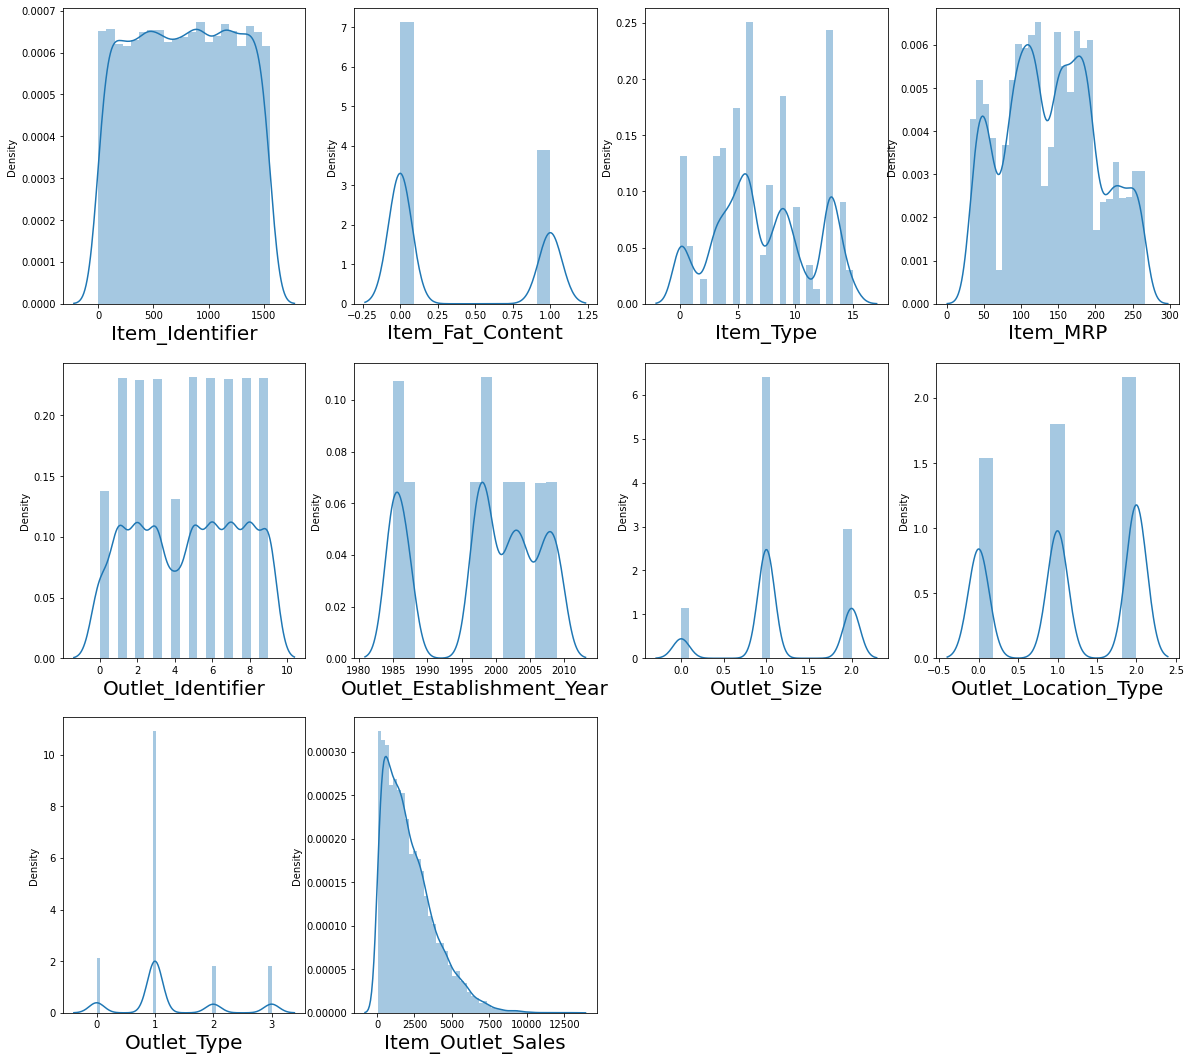

In [ ]:
plt.figure(figsize = (20,25))
graph = 1

for column in train_data:
  if graph<=15:
    ax = plt.subplot(4,4,graph)
    sns.distplot(train_data[column])
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

Item outlet sales show the skewed data.

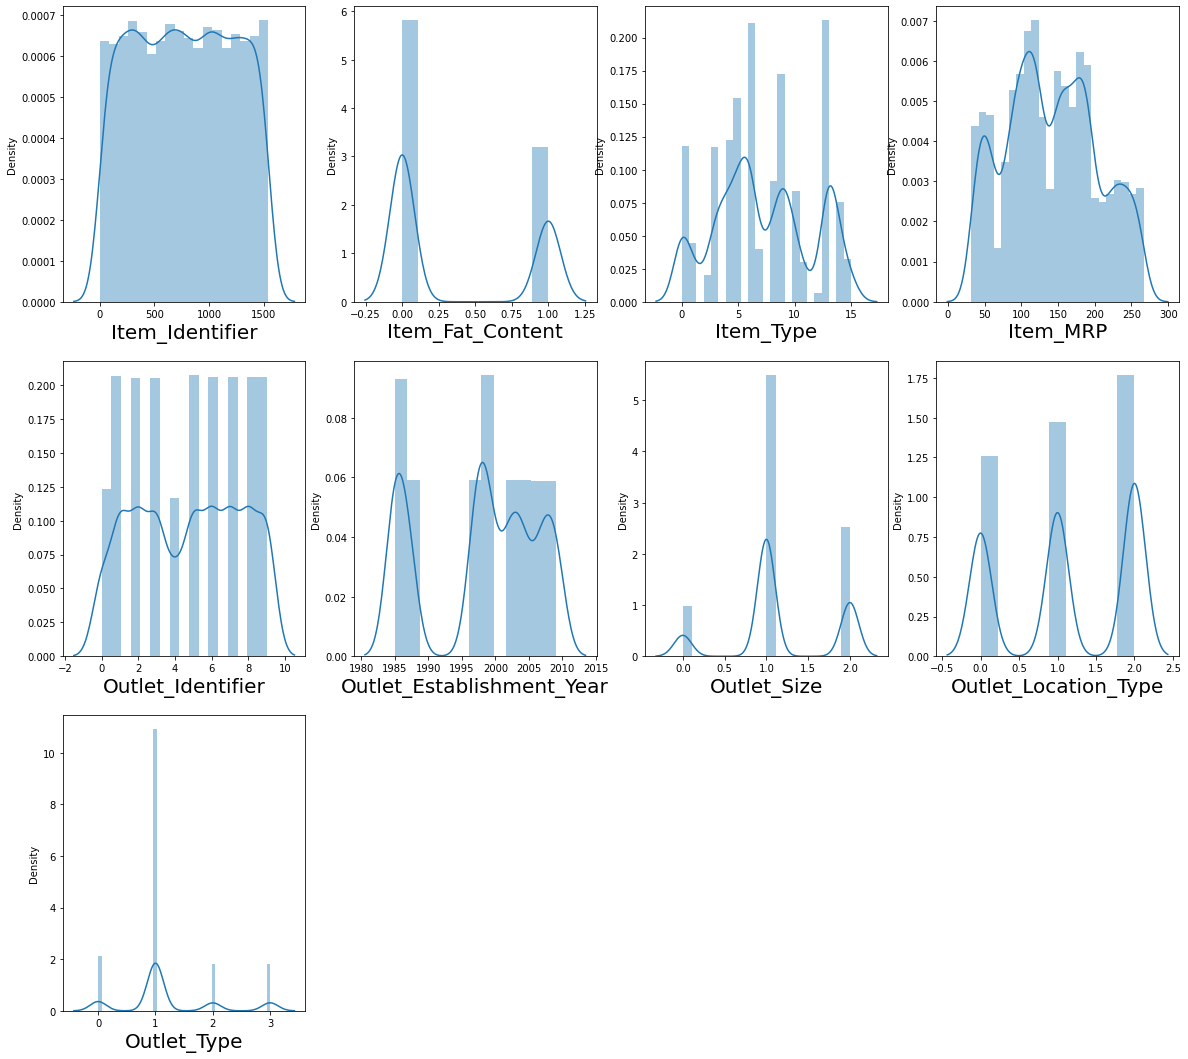

In [ ]:
plt.figure(figsize = (20,25))
graph = 1

for column in test_data:
  if graph<=15:
    ax = plt.subplot(4,4,graph)
    sns.distplot(test_data[column])
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

There is no skewness in the test data.

In [ ]:
#Applying z score
from scipy.stats import zscore
z = np.abs(zscore(train_data))

train1 = train_data[(z<3).all(axis = 1)]

Applying z score to deal with the outliers.

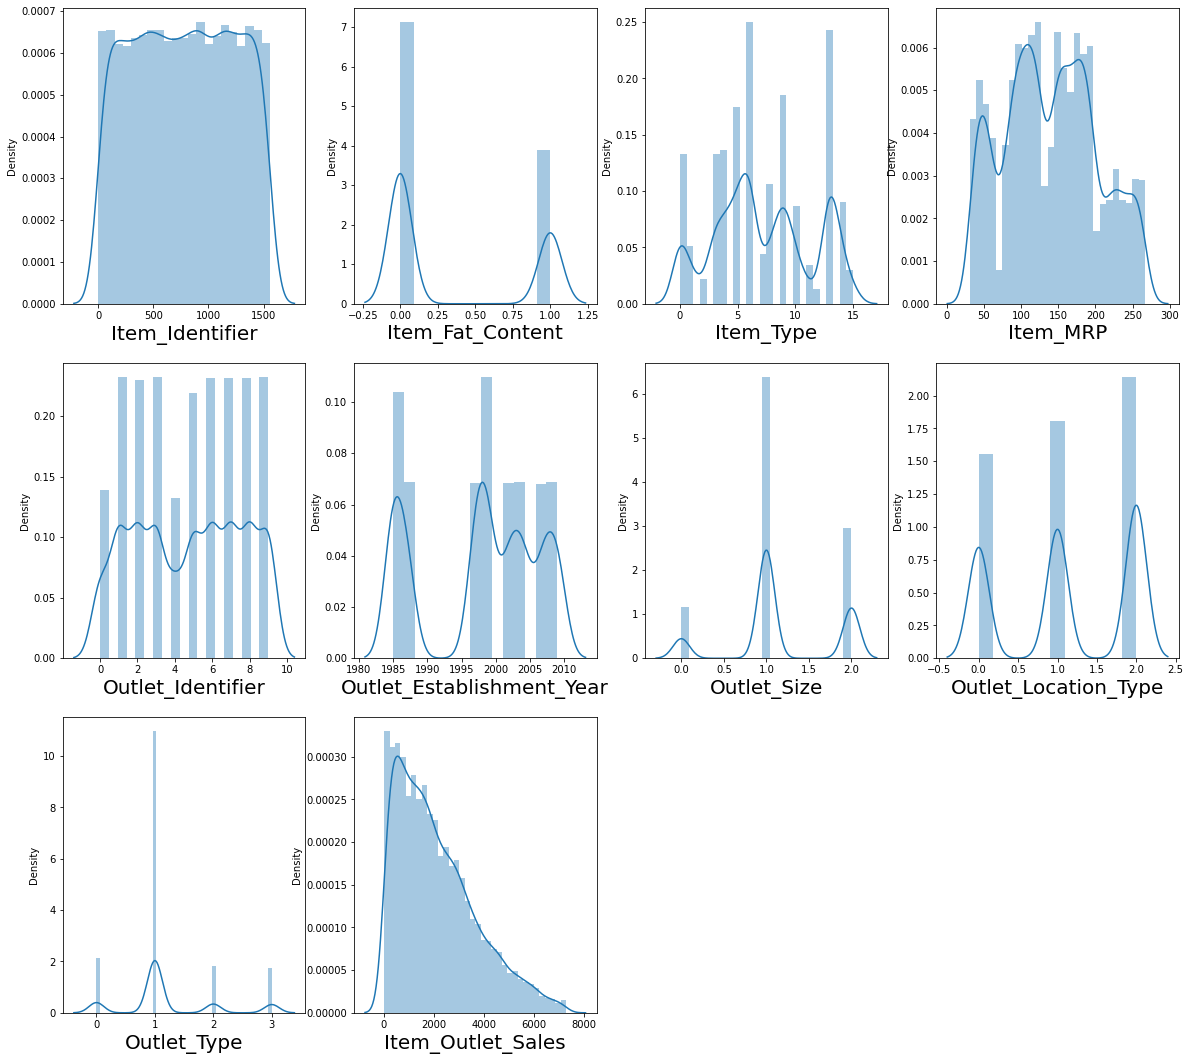

In [ ]:
plt.figure(figsize = (20,25))
graph = 1

for column in train1:
  if graph<=15:
    ax = plt.subplot(4,4,graph)
    sns.distplot(train1[column])
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

The skewness has reduced after applying the z score.

In [ ]:
#Applying z score
from scipy.stats import zscore
z = np.abs(zscore(test_data))

test1 = test_data[(z<3).all(axis = 1)]

Applying z score to the test data

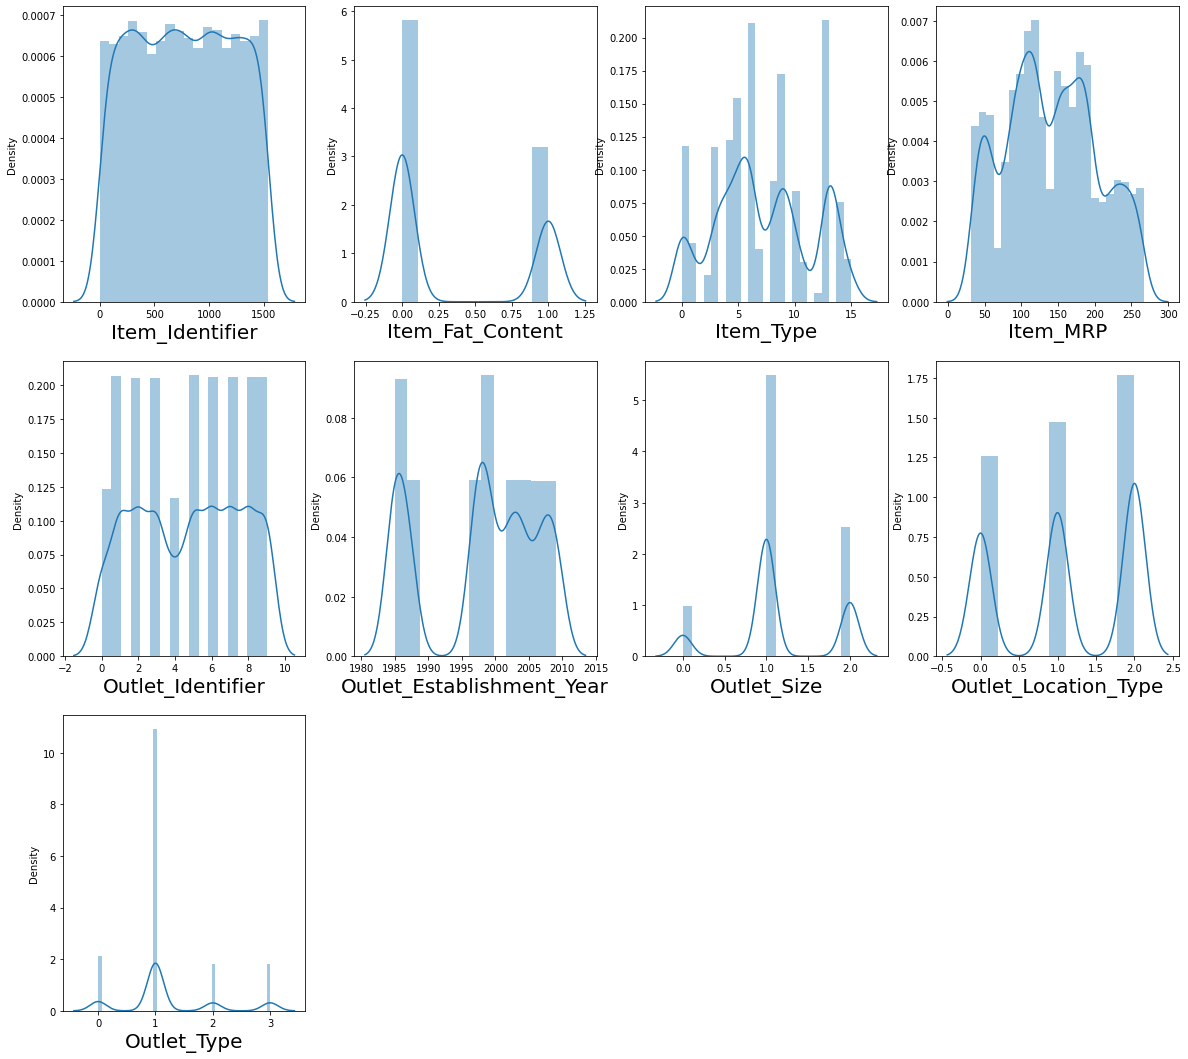

In [ ]:
plt.figure(figsize = (20,25))
graph = 1

for column in test1:
  if graph<=15:
    ax = plt.subplot(4,4,graph)
    sns.distplot(test1[column])
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

The data is more towards normal distribution after applying the z score.

In [ ]:
train1.skew()

Item_Identifier             -0.008211
Item_Fat_Content             0.616846
Item_Type                    0.099041
Item_MRP                     0.137074
Outlet_Identifier           -0.057465
Outlet_Establishment_Year   -0.410554
Outlet_Size                 -0.092205
Outlet_Location_Type        -0.198522
Outlet_Type                  0.936123
Item_Outlet_Sales            0.885157
dtype: float64

The skewness is fine for all the columns in the train data except for the Item fat content, outlet type and the item outlet sales

In [ ]:

test1.skew()

Item_Identifier             -0.000020
Item_Fat_Content             0.609223
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Identifier           -0.060209
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

The skewness is fine for all the columns in the train data except for the Item fat content and the item outlet sales

In [ ]:
X = train1.drop(columns = 'Item_Outlet_Sales', axis = 1)
Y = train1['Item_Outlet_Sales']

Spliting the dependent variable as Y and the independent variable as X.

In [ ]:
test1.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,773.386376,0.354339,7.233410,141.023273,4.722760,1997.828903,1.170921,1.112832,1.201373
std,445.525926,0.478355,4.219057,61.809091,2.837201,8.372256,0.600328,0.812824,0.796740
min,0.000000,0.000000,0.000000,31.990000,0.000000,1985.000000,0.000000,0.000000,0.000000
25%,382.000000,0.000000,4.000000,94.412000,2.000000,1987.000000,1.000000,0.000000,1.000000
50%,771.000000,0.000000,6.000000,141.415400,5.000000,1999.000000,1.000000,1.000000,1.000000
75%,1160.000000,1.000000,10.000000,186.026600,7.000000,2004.000000,2.000000,2.000000,1.000000
max,1542.000000,1.000000,15.000000,266.588400,9.000000,2009.000000,2.000000,2.000000,3.000000


The description of the test data.


In [ ]:
#MODEL BUILDING

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(                                      
    X, Y, test_size=0.25, random_state=25)                                                                            

Applying test train split

In [ ]:
models = [LinearRegression(), RandomForestRegressor(),
          XGBRegressor(), GradientBoostingRegressor(), SVR(epsilon=15,kernel='linear')]
model_names = ['LR','RF', 'XGB','GB', 'svm']

r2 = []
mse = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    r2.append(r2_score(y_test,pred))
    mse.append(mean_squared_error(y_test,pred))
    

models = {'Modelling Algorithm': model_names, 'r2 score': r2, 'MSE' : mse}
models_df = pd.DataFrame(models)
models_df


[03:08:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Modelling Algorithm,r2 score,MSE
0,LR,0.498978,1.292507e+06
1,RF,0.540022,1.186624e+06
2,XGB,0.596919,1.039844e+06
3,GB,0.597127,1.039308e+06
4,svm,0.474795,1.354894e+06


The r2 value and MSE for all the regression algorithms.

In [ ]:
#cross validation 

from sklearn.model_selection import KFold, cross_val_score,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=25)

models = [LinearRegression(), RandomForestRegressor(),
          XGBRegressor(), GradientBoostingRegressor(), SVR(epsilon=15,kernel='linear')]
model_names = ['LR','RF', 'XGB','GB', 'svm']


k_f = KFold(n_splits = 4, shuffle = True)
k_f

CV_S = []

for model in range(len(models)):
    clf = models[model]
    c = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    CV_S.append(cross_val_score(c, X, Y, cv = 5).mean())
    

CV = {'Modelling Algorithm': model_names, 'CV SCORE': CV_S}
CV_df = pd.DataFrame(CV)
CV_df

[03:08:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:08:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:08:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:09:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:09:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:09:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Modelling Algorithm,CV SCORE
0,LR,0.499199
1,RF,0.534136
2,XGB,0.589847
3,GB,0.588384
4,svm,0.476907


Applying cross validation for all the regression models.

In [ ]:
#Comparing CV Score and the r2 score:

Comparison = pd.DataFrame({})
Comparison['Modelling Algorithm'] =  model_names
Comparison['r2 score'] = r2
Comparison['CV SCORE'] = CV_S
Comparison['Difference'] = [r2[0] - CV_S[0], r2[1] - CV_S[1], r2[2] - CV_S[2], r2[3] - CV_S[3] , r2[4] - CV_S[4]]
Comparison

,Modelling Algorithm,r2 score,CV SCORE,Difference
0,LR,0.498978,0.499199,-0.000221
1,RF,0.540022,0.534136,0.005885
2,XGB,0.596919,0.589847,0.007072
3,GB,0.597127,0.588384,0.008743
4,svm,0.474795,0.476907,-0.002113


After comparing r2 score and the CV score, the difference between the two is minimum for the Random Forest Regressor. So, we will apply hyperparameter tuning on the Random Forest Regressor.

In [ ]:
#HYPERPARAMETER TUNING:
from sklearn.model_selection import GridSearchCV

grid_param = {
    'criterion' : ['mse' , 'mae'],
    'min_samples_split' : range(1,7,2),
    'max_depth' : range(2,14,2),
    'n_estimators' : [100,200]
}

Provided different parameter for hyperparameter tuning.


In [ ]:
grid = GridSearchCV(RandomForestRegressor(), param_grid = grid_param)

Applied grid search CV.

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

Trained the model.

In [ ]:
best_parameters = grid.best_params_
print(best_parameters)

{'criterion': 'mse', 'max_depth': 6, 'min_samples_split': 3, 'n_estimators': 100}


Got the best parameters.

In [ ]:
#FINAL MODEL
#Substituting the best parameters in the  GradientBoostingRegressor:

rf =  RandomForestRegressor(criterion = 'mse', min_samples_split = 3, max_depth = 6, n_estimators = 100 )

rf.fit(X_train, y_train)
pred = rf.predict(X_test)
rscore = r2_score(y_test, pred)
rscore

0.5956118859548819

Substituted the best parameters in the model and calculated the r2 value for the model.

In [ ]:
#SAVING THE MODEL:

import joblib
joblib.dump(rf, 'bigmart_final_model.pkl')

['bigmart_final_model.pkl']

Saved the final model.

In [ ]:
# predicting on actual test data

columns = ['Item_Identifier' ,	'Item_Fat_Content',	'Item_Type' ,	'Item_MRP',	'Outlet_Identifier' ,	'Outlet_Establishment_Year' ,	'Outlet_Size' ,	'Outlet_Location_Type' ,	'Outlet_Type']


X_t = test1[columns]
y_result = rf.predict(X_t)

Used the test data for prediction

In [ ]:
pd.Series(y_result)

0       1637.932401
1       1317.071169
2        572.697472
3       2502.666056
4       5098.665099
           ...     
5676    2123.644247
5677    2576.667736
5678    1920.190591
5679    3464.356385
5680    1251.361977
Length: 5681, dtype: float64

The result of the predicted values from the test data.